# 차원 축소

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

iris = load_iris()

iris_df = pd.DataFrame(iris['data'], columns=iris.feature_names)
iris_df['target'] = iris['target']
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

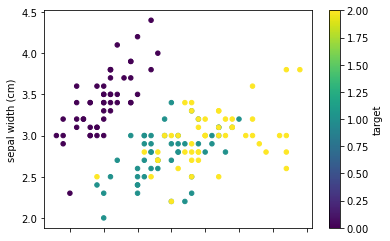

In [2]:
iris_df.plot.scatter(x='sepal length (cm)', y='sepal width (cm)', c='target', colormap='viridis' )

## PCA를 활용한 차원 축소

<AxesSubplot:xlabel='0', ylabel='1'>

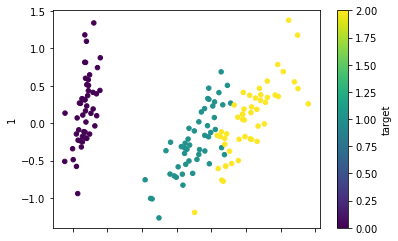

In [3]:
pca = PCA(n_components=2)
x = pca.fit_transform(iris['data'])
x = pd.DataFrame(x)
x['target'] = iris['target']
x.plot.scatter(x=0, y=1, c='target', colormap='viridis' )

## LDA를 활용해 차원 축소

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
x = lda.fit_transform(iris.data, iris.target) 
x = pd.DataFrame(x)
x['target'] = iris['target']
x.head()

,0,1,target
0,8.061800,0.300421,0
1,7.128688,-0.786660,0
2,7.489828,-0.265384,0
3,6.813201,-0.670631,0
4,8.132309,0.514463,0


<AxesSubplot:xlabel='0', ylabel='1'>

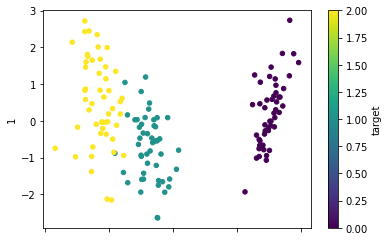

In [5]:
x.plot.scatter(x=0, y=1, c='target', colormap='viridis' )

- LDA: supervised learning

데이터의 클래스의 차이가 분산보다 `평균`의 차이에 있을 때, LDA는 PCA보다 뛰어난 성능을 보여준다.
3D plot으로 데이터를 표현할 때, LDA는 PCA보다 뛰어난 성능을 보여준다.

- PCA: unsupervised learning

데이터의 클래스의 차이가 평균보다 `분산`의 차이에 있을 때, PCA는 LDA보다 뛰어난 성능을 보여준다.

## SVD
SVD는 행렬 분해의 중요한 뼈대입니다. 머신러닝에서는 주로 추천 시스템을 구성할때 SVD를 통한 행렬 분해를 통해서 사용자가 사지 않은 물품중에 최적 물품을 추천합니다.(물론 이미지 압축 기반의 패턴 인식과 LSA 토픽 모델링 기법에도 사용됩니다) 
SVD는 독립적인 특이 벡터를 추출합니다.  때문에 특정 벡터가 다른 벡터를 기반으로 만들어지면 분해되는 특이 벡터 갯수가 상대적으로 적습니다 - 권철민 님

<AxesSubplot:xlabel='0', ylabel='1'>

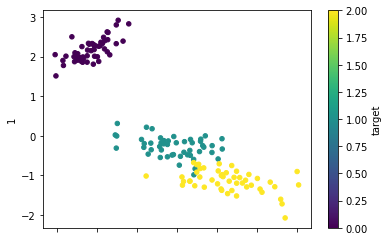

In [6]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2)
x = svd.fit_transform(iris.data, iris.target)
x = pd.DataFrame(x)
x['target'] = iris.target
x.plot.scatter(x=0, y=1, c='target', colormap='viridis' )

numpy 에서 svd 모듈을 사용해 행렬 구성하기

In [8]:
import numpy as np
from scipy.sparse.linalg import svds
from numpy.linalg import svd

np.random.seed(121) # 랜덤 시드
a = np.random.randn(4,4) # 4x4 행렬
print("원본 데이터:\n", np.round(a,3)) # 세자리수에서 반올림

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 구성하여 Trucated SVD 수행
num_components = 2
U_tr, Sigma_tr, Vt_tr = svds(a, k=num_components)
print("Truncated SVD 분해 행렬 차원:", U_tr.shape, Sigma_tr.shape, Vt_tr.shape)

matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr)
print("Truncated SVD 분해 후 복원 행렬:", matrix_tr)

원본 데이터:
 [[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]
Truncated SVD 분해 행렬 차원: (4, 2) (2,) (2, 4)
Truncated SVD 분해 후 복원 행렬: [[ 0.11776606 -0.4224323  -0.45148469 -0.3026849 ]
 [-0.26478267  1.18754777  1.62022235  0.37986869]
 [ 0.08305338  0.52807808  1.78380053 -1.25805288]
 [ 0.30468393 -0.10724542  1.34051007 -2.02962493]]


## NMF 비음수 행렬 분해
 NMF의 경우 보통은 텍스트에서 Topic를 추출하는데 많이 사용됩니다. 보통 텍스트를 vectorization하게 되면 굉장히 많은 차원(많은 피처들로 구성)으로 구성되게 되는데 이때 NMF를 적용해서 텍스트 내에 Topic을 추출하는데 사용됩니다. - 권철민

In [ ]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=2)
x = nmf.fit_transform(iris.data, iris.target)
x = pd.DataFrame(x)
x['target'] = iris.target

W = nmf.fit_transform(iris.data, iris.target)
H = nmf.components_
print("W:\n", W)
print("H:\n", H)

<AxesSubplot:xlabel='0', ylabel='1'>

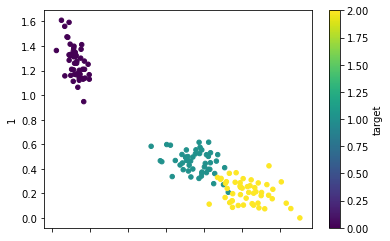

In [12]:
x.plot.scatter(x=0, y=1, c='target', colormap='viridis')